# Churn Modeling

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

Here we have 13 feature columns and **Exited** is a target column.

**Row Numbers:-**
Row Numbers from 1 to 10000.


**CustomerId:-**
Unique Ids for bank customer identification.

**Surname:-**
Customer's last name.

**CreditScore:-**
Credit score of the customer.

**Geography:-**
The country from which the customer belongs(Germany/France/Spain).

**Gender:-**
Male or Female(Female/Male).

**Age:-**
Age of the customer.

**Tenure:-**
Number of years for which the customer has been with the bank.

**Balance:-**
Bank balance of the customer.

**NumOfProducts:-**
Number of bank products the customer is utilising.

**HasCrCard:-**
Binary Flag for whether the customer holds a credit card with the bank or not(0=No,1=Yes).

**IsActiveMember:-**
Binary Flag for whether the customer is an active member with the bank or not(0=No,1=Yes).

**EstimatedSalary:-**
Estimated salary of the customer in Dollars.

**Exited:-**
Binary flag 1 if the customer closed account with bank and 0 if the customer is retained(0=No,1=Yes).

# 1. Import Liberary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Exploratory Data Analysis

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(10000, 14)

In [8]:
Catagorical_Features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

**1. CreditScore**

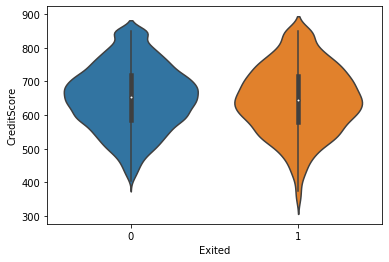

In [9]:
sns.violinplot(x=df['Exited'], y=df['CreditScore'])

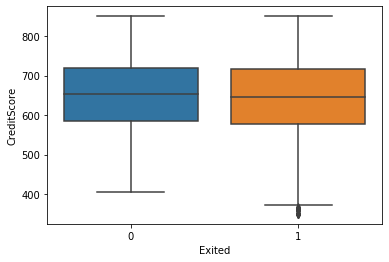

In [10]:
sns.boxplot(x=df['Exited'], y=df['CreditScore'])

CreditScore is lessthen 400 then high chance that account will closed.

**2. Geography**

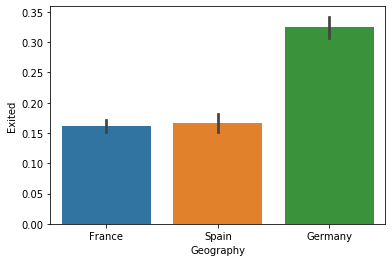

In [11]:
sns.barplot(x=df['Geography'], y=df['Exited'])

German person have almost double probablity of close account compare to other.

**3. Gender**

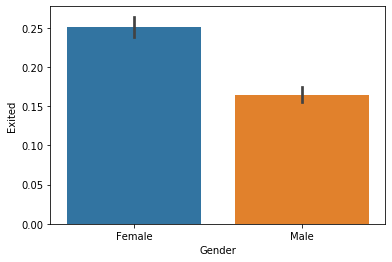

In [12]:
sns.barplot(x=df['Gender'], y=df['Exited'])

female close more account compare to male.

**4. Age**

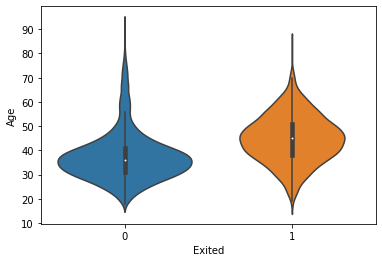

In [13]:
sns.violinplot(x=df['Exited'], y=df['Age'])

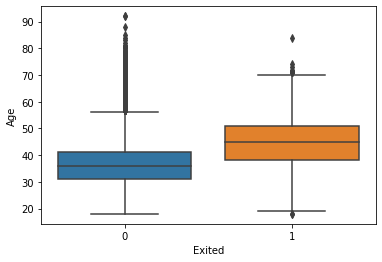

In [14]:
sns.boxplot(x=df['Exited'], y=df['Age'])

age is between 30 to 40 then less chance of close account but age between 41 to 50 then more chance of close account.

**5. Tenure**

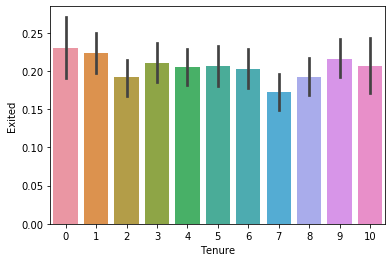

In [15]:
sns.barplot(x=df['Tenure'], y=df['Exited'])

**6. Balance**

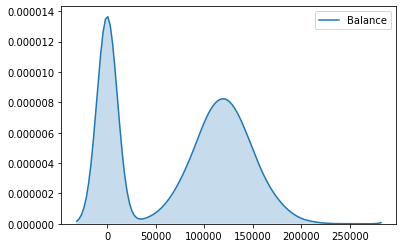

In [16]:
sns.kdeplot(data=df['Balance'],shade=True)

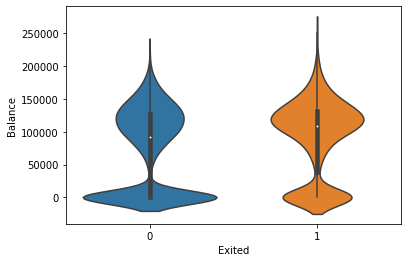

In [17]:
sns.violinplot(x='Exited', y='Balance', data=df)

if balance is between 90000 to 150000 then it is more chance the account is close but balance is 0 then less chance for close account.

**7. NumOfProducts**

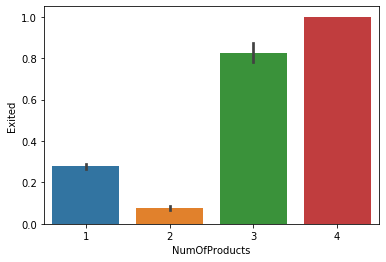

In [18]:
sns.barplot(x=df['NumOfProducts'], y=df['Exited'])

customer utilize more then 2 bank products then there are higher chance that customer close account.

**8. HasCrCard**

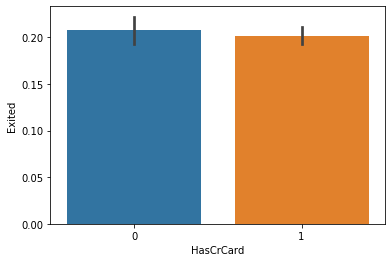

In [19]:
sns.barplot(x='HasCrCard', y='Exited', data=df)

we don't show any mejor diffrence who have cradit card or not.

**9. IsActiveMember**

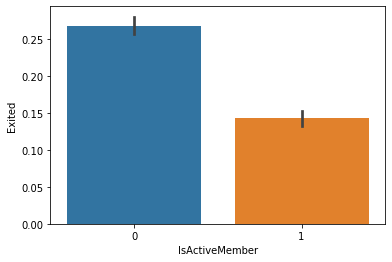

In [20]:
sns.barplot(x = df['IsActiveMember'], y= df['Exited'])

here higher chance of close account who is not active member.

**10. EstimatedSalary**

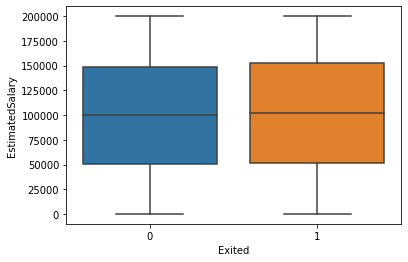

In [21]:
sns.boxplot(x=df['Exited'], y=df['EstimatedSalary'])

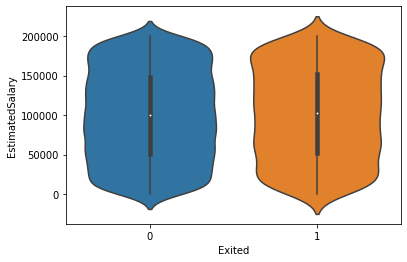

In [22]:
sns.violinplot(x=df['Exited'], y=df['EstimatedSalary'])

we don't get any usefull information from EstimatedSalary column.

# 3. Data Preprocesing

**Upsample Data**

In [23]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [24]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Exited==0]
df_minority = df[df.Exited==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=7963,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.Exited.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    7963
0    7963
Name: Exited, dtype: int64

In [25]:
df = df_upsampled.copy()

In [26]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


**convert catagorical value in numeric value**

In [27]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [28]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
6,7,15592531,Bartlett,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
8,9,15792365,He,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1


Here RowNumber, CustomerId and Surname is not use in churn modeling

In [29]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [30]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1


In [31]:
df.shape

(15926, 12)

here we have 12 columns and we find correlation between them. Threshold = 0.85 

In [32]:
def person_corr(df):
    df_dup = df.copy()
    df_corr = df.corr() # Find Correlation of dataframe
    col_name = df_corr.columns
    col = list()
    for i in df_corr:
        for j in col_name:
            if (df_corr[i][j]>0.0) & (i!=j) & (i not in col): # set threshold 0.85
                col.append(j)
    df_dup.drop(columns=col,inplace=True)
    return df_dup

In [33]:
df_diff_col = person_corr(df)

here we don't have correlated columns.

In [34]:
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.012884,0.002117,0.006548,0.006463,0.001990,0.019424,-0.017717,-0.044285,0.006601,0.012445,-0.012955
Age,-0.012884,1.000000,-0.017553,0.049590,-0.024056,-0.023099,0.011224,-0.003999,0.352706,0.074009,-0.018796,-0.039137
Tenure,0.002117,-0.017553,1.000000,0.002769,0.020536,0.022136,-0.030044,0.023952,-0.014121,0.005511,-0.013134,0.010803
Balance,0.006548,0.049590,0.002769,1.000000,-0.184336,-0.005761,-0.029862,0.000085,0.153366,0.415656,-0.148643,0.012042
NumOfProducts,0.006463,-0.024056,0.020536,-0.184336,1.000000,-0.010544,0.031860,0.016220,-0.049513,-0.016154,0.009972,-0.030346
HasCrCard,0.001990,-0.023099,0.022136,-0.005761,-0.010544,1.000000,-0.021923,-0.016983,-0.011530,0.014908,-0.023580,0.015309
IsActiveMember,0.019424,0.011224,-0.030044,-0.029862,0.031860,-0.021923,1.000000,-0.005190,-0.190884,-0.031312,0.004356,0.022077
EstimatedSalary,-0.017717,-0.003999,0.023952,0.000085,0.016220,-0.016983,-0.005190,1.000000,0.012024,-0.011722,0.003889,-0.015960
Exited,-0.044285,0.352706,-0.014121,0.153366,-0.049513,-0.011530,-0.190884,0.012024,1.000000,0.205557,-0.067512,-0.121596
Geography_Germany,0.006601,0.074009,0.005511,0.415656,-0.016154,0.014908,-0.031312,-0.011722,0.205557,1.000000,-0.365171,-0.017431


# 4. Train Model

In [35]:
X_train = df.drop(columns=['Exited'])
y_train = df['Exited']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [37]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


In [38]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

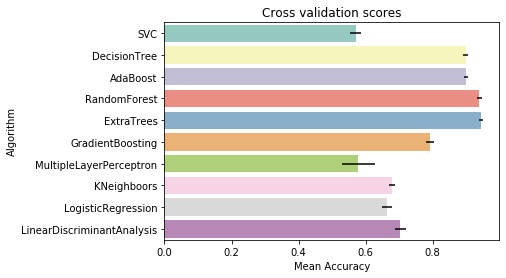

In [39]:
import seaborn as sns

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


we train our model using- Random Forest and Extra Trees classifier. best model we choose.

In [40]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {
#               "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[50,100,200,300],
              "criterion": ["gini"]}
etc_folds = []
etcc = []
for i in range(5,18,2):

    kfold =i
    gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

    gsExtC.fit(X_train,y_train)

    ExtC_best = gsExtC.best_estimator_
    etc_folds.append(gsExtC.best_score_)
    etcc.append(ExtC_best)
# Best score
gsExtC.best_score_


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


Fitting 7 folds for each of 36 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  2.6min finished


Fitting 9 folds for each of 36 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  3.4min finished


Fitting 11 folds for each of 36 candidates, totalling 396 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 396 out of 396 | elapsed:  4.2min finished


Fitting 13 folds for each of 36 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:  7.9min finished


Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 11.8min finished


Fitting 17 folds for each of 36 candidates, totalling 612 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 612 out of 612 | elapsed: 15.7min finished


0.9503956432694098

In [41]:
y_ext = gsExtC.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,y_ext)

array([[2252,  146],
       [  75, 2305]], dtype=int64)

In [43]:
f1_score(y_test,y_ext)

0.9542537776857793

In [44]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {
#               "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[50,100,200,300],
              "criterion": ["gini"]}

rfc_folds =[]
rfcc = []
for i in range(5,18,2):
    kfold = i

    gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

    gsRFC.fit(X_train,y_train)

    RFC_best = gsRFC.best_estimator_
    
    rfc_folds.append(gsRFC.best_score_)
    rfcc.append(RFC_best)
# Best score
gsRFC.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  8.4min finished


Fitting 7 folds for each of 36 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed: 11.8min finished


Fitting 9 folds for each of 36 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 12.2min finished


Fitting 11 folds for each of 36 candidates, totalling 396 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 396 out of 396 | elapsed: 10.6min finished


Fitting 13 folds for each of 36 candidates, totalling 468 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed: 13.0min finished


Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 14.8min finished


Fitting 17 folds for each of 36 candidates, totalling 612 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 612 out of 612 | elapsed: 16.7min finished


0.9515613534559234

In [45]:
y_rfc = gsRFC.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,y_rfc)

array([[2252,  146],
       [  68, 2312]], dtype=int64)

In [47]:
f1_score(y_test,y_rfc)

0.9557668458040512

We choose Random Forest for Classification

In [48]:
exited_pred = pd.Series(gsRFC.predict(X_test), name="Exited_pred")

y_test.reset_index(drop=True, inplace=True)

results = pd.concat([y_test, exited_pred],axis=1)

results.to_csv("churn_modling_RFC.csv",index=False)